In [ ]:
Варіант 5. A-Kaze

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def custom_matcher(descriptors1, descriptors2, ):
    matches = []
    for i, des1 in enumerate(descriptors1):
        min_distance = float('inf')
        min_idx = -1
        for j, des2 in enumerate(descriptors2):
            distance = np.linalg.norm(des1 - des2)
            if distance < min_distance:
                min_distance = distance
                min_idx = j
        matches.append(cv.DMatch(_queryIdx=i, _trainIdx=min_idx, _distance=min_distance))

    return matches

In [3]:
def my_match(img1,img2):
    akaze = cv.AKAZE_create()
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)
    matches = sorted(custom_matcher(des1, des2), key=lambda x: x.distance)
    N = 50
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:N], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)

In [4]:
def brute_force_match(img1,img2):
    akaze = cv.AKAZE_create()
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = sorted(bf.match(des1,des2), key = lambda x:x.distance)
    N=50
    img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:N],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.imshow(img3)

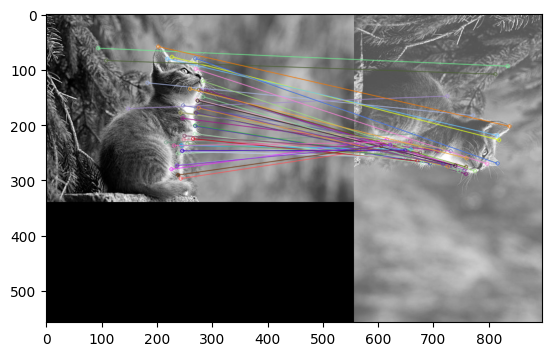

In [5]:
img1 = cv.imread('img_1.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img_2.jpg', cv.IMREAD_GRAYSCALE)
my_match(img1,img2)

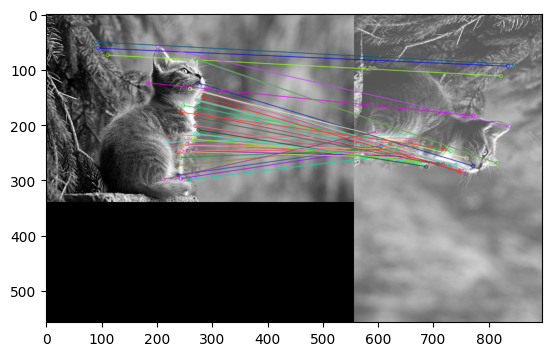

In [6]:
brute_force_match(img1,img2)

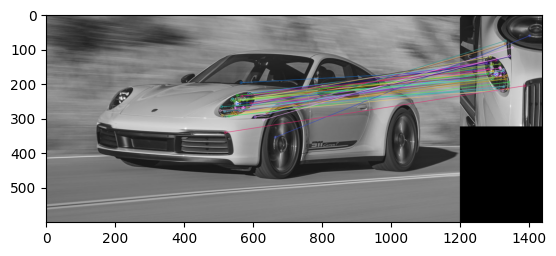

In [9]:
img3 = cv.imread('img_3.jpeg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('img_4.jpeg', cv.IMREAD_GRAYSCALE)
my_match(img3,img4)

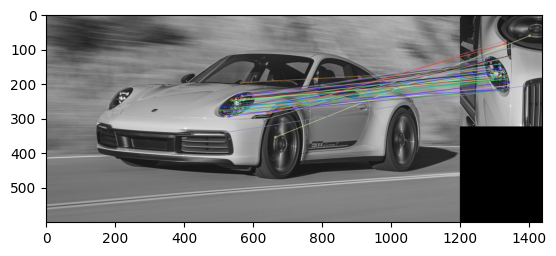

In [8]:
brute_force_match(img3,img4)